In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
from numpy.random import *
from MCF import MCF

### 1

\begin{eqnarray}
\left\{
\begin{array}{1}
    x_t = x_{t-1}+v_t && v_t\sim N(0,1)\\
    y_t=  x_t + e_t && e_t\sim N(0,0.25)
\end{array}
\right.
\end{eqnarray}

$T = 50, p(x_0)=0$

100%|██████████| 50/50 [00:07<00:00,  6.56it/s]


Simulation finished successfully.


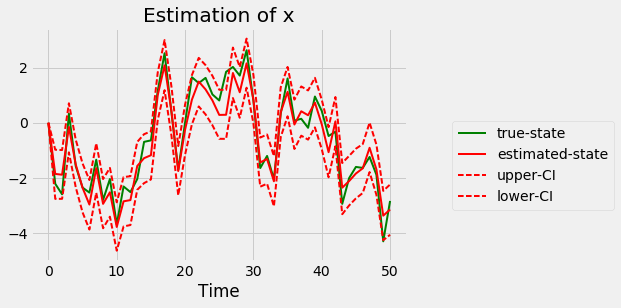

In [2]:
#線形ガウス型状態空間モデル

#システム方程式、観測方程式は以下。
#X=[x1, x2, ...]の形式
def system_equation_1(X, t):
    v = normal(0,1,1)
    return np.array([X[0] + v])
def obs_equation_1(X):
    e = normal(0,0.5)
    return X[0] + e

#予測分布の発生式
#X_samplesは[x1_samples, x2_samples, ...]の形式
def system_equation_gen_1(X_samples, t):
    x_samples = X_samples[0]
    v = normal(0,1,len(x_samples))
    return np.array([x_samples + v])
#尤度の計算式
def obs_L_1(X,y):
    x = X[0]
    t = y-x
    return (1/np.sqrt(2*np.pi*0.25))*np.exp(-1 * (t**2) / 0.5)

#10000個の0の値の粒子から、50ステップのシミュレーションを行う。
MCF_0 = MCF(system_equation_1, obs_equation_1, system_equation_gen_1, obs_L_1, ['x'], np.zeros([1,10000]),50)

#初期値x_0を0として、T=50までの真の状態x_tと観測値y_tを発生させる
MCF_0.DataGenerate([0])
#計算を行う
MCF_0.Filtering()
summary = MCF_0.Get_summary(plot=True)

### 2

\begin{eqnarray}
\left\{
\begin{array}{1}
    \alpha_t = \alpha_{t-1}+v_t && v_t\sim N(0,1)\\
    \beta_t = \beta_{t-1} + v'_t && v'_t\sim N(\frac{1}{4}\pi,\frac{1}{6}\pi)\\
    y_t=  \alpha_t + 10cos\beta_t + e_t && e_t\sim N(0,0.1)
\end{array}
\right.
\end{eqnarray}

$T = 50, p(x_0)=0$

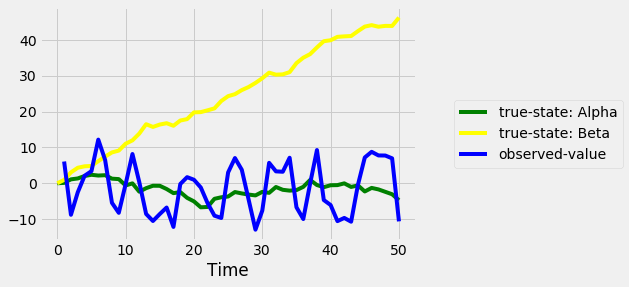

In [22]:
#非線形・ガウス型で状態変数が2つの場合、システム方程式、観測方程式は以下。
def system_equation_1(X, t):
    v = normal(0,1,1)
    v_ = normal(np.pi/4,np.pi/4,1)
    return np.hstack((X[0] + v, X[1] + v_))

def obs_equation_1(X):
    e = normal(0,0.1)
    return X[0] + 10* np.cos(X[1]) + e

#予測分布の発生式
def system_equation_gen_1(X_samples, t):
    v = normal(0,1,len(X_samples[0]))
    v_ = normal(np.pi/4,np.pi/4,len(X_samples[0]))
    return np.vstack((X_samples[0] + v, X_samples[1]+v_))

#尤度の計算式
def obs_L_1(X,y):
    t = y - X[0] - 10* np.cos(X[1])
    return (1/np.sqrt(2*np.pi*0.01))*np.exp(-1 * (t**2) / 0.02)

#10000個の0の値の粒子から、50ステップのシミュレーションを行う。
MCF_1 = MCF(system_equation_1, obs_equation_1, system_equation_gen_1, obs_L_1, ['Alpha', 'Beta'], np.zeros([2,10000]),50)
#初期値x_0を0として、T=50までの真の状態x_tと観測値y_tを発生させる
MCF_1.DataGenerate([0, 0], plot=True)

100%|██████████| 50/50 [00:07<00:00,  6.32it/s]


Simulation finished successfully.


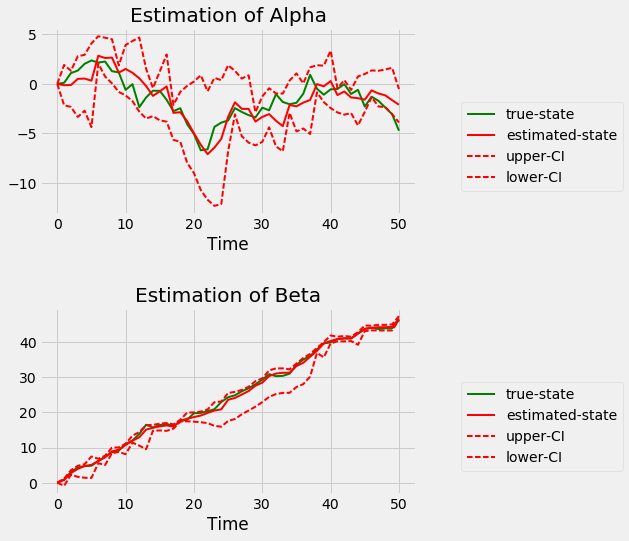

In [23]:
#計算を行う
MCF_1.Filtering()
summary = MCF_1.Get_summary(plot=True)

### 3

\begin{eqnarray}
\left\{
\begin{array}{1}
    x_t = \frac{1}{2}x_{t-1}+ 25 \frac{x_{t-1}}{1+x_{t-1}^2} + 8cos(1.2t) + v_t && v_t\sim N(0,1)\\
    y_t=  \frac{1}{2}x_t^2 + e_t && e_t\sim N(0,10)
\end{array}
\right.
\end{eqnarray}

100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


Simulation finished successfully.


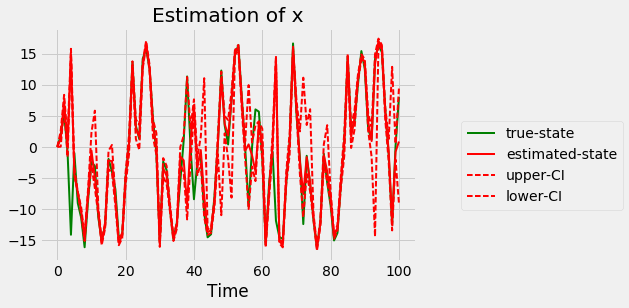

In [24]:
#次に、非線形・ガウス型状態空間モデル。（Kitagawa 1993, 1996）

#システム方程式、観測方程式は以下。
def system_equation_2(x, t):
    v = normal(0,1)
    return np.array([(1/2) * x[0] + 25 * x[0] / (1 + x[0] **2) + 8 * np.cos(1.2 * t) + v])
def obs_equation_2(x):
    e = normal(0,10)
    return (1/2) * (x**2) + e
#予測分布の発生式
def system_equation_gen_2(x_samples, t):
    v = normal(0,1,len(x_samples[0]))
    t_array = np.ones(len(x_samples[0]))
    t_array = t * t_array
    return np.array([(1/2) * x_samples[0] + 25 * x_samples[0] / (1 + x_samples[0] **2) + 8 * np.cos(1.2 * t_array) + v])
#尤度の計算式
def obs_L_2(x,y):
    t = y - (1/2) * (x[0]**2)
    return (1/np.sqrt(2*np.pi*10))*np.exp(-1 * (t**2) / 20)

#10000個の0の値の粒子から、100ステップのシミュレーションを行う。
MCF_2 = MCF(system_equation_2, obs_equation_2, system_equation_gen_2, obs_L_2, ['x'],np.zeros([1,10000]),100)
#初期値x_0を0として、T=100までの真の状態x_tと観測値y_tを発生させる
MCF_2.DataGenerate([0],plot=False)
#計算を行う
MCF_2.Filtering()
summary = MCF_2.Get_summary(plot=True)

### 4

###### 確率的ボラティリティモデル（Stochastic Volatility Model, SV）

\begin{eqnarray}
\left\{
\begin{array}{1}
    x_t = 0.98x_{t-1}+v_t && v_t\sim N(0,0.5)\\
    y_t=e_texp(\frac{x}{2}) && e_t\sim N(0,1)
\end{array}
\right.
\end{eqnarray}

ここで、観測方程式については対数化した以下の式を用いて、尤度を計算する。

\begin{eqnarray}
\left\{
\begin{array}{1}
    loge_t &=& logy_t - \frac{x}{2} && (y >0, e_t>0) \\
    log(-e_t) &=& log(-y_t) - \frac{x}{2} && (y < 0, e_t<0) 
\end{array}
\right.
\end{eqnarray}


具体的には、尤度（重み）$w_t^i$は以下の式に従うことが計算より分かる。


\begin{eqnarray}
    \left\{
    \begin{array}{1}
        s &=& logy_t - \frac{x}{2} && (y > 0)\\
        s &=& -log(-y_t) + \frac{x}{2} && (y < 0)\\
    \end{array}
    \right.
\end{eqnarray}
<br>
\begin{eqnarray}
    w_t^i = p(y_t|x_t^i) &=& \frac{1}{\sqrt{2\pi}}exp(s - \frac{1}{2}exp(2s))
\end{eqnarray}

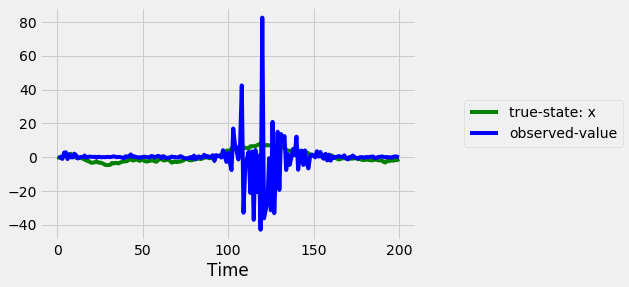

In [27]:
#確率的ボラティリティモデル（Stochastic Volatility Model, SV）

#システム方程式、観測方程式は以下。
def system_equation_3(x, t):
    v = normal(0,0.5)
    return np.array([0.98 * x[0] + v])
def obs_equation_3(x):
    e = normal(0,1)
    return e * np.exp(x/2)

#予測分布の発生式
def system_equation_gen_3(x_samples, t):
    v = normal(0,0.5,len(x_samples[0]))
    return np.array([0.98 * x_samples[0] + v])

#尤度の計算式
def obs_L_3(x,y):
    s = 0
    if y[0] >0:
        s = np.log(y) - x[0]/2
    else:
        s = -np.log(-y) + x[0]/2
    return np.exp(s - np.exp(2*s) / 2) / np.sqrt(2*np.pi)

#10000個の0の値の粒子から、200ステップのシミュレーションを行う。
MCF_3 = MCF(system_equation_3, obs_equation_3, system_equation_gen_3, obs_L_3, ['x'],np.zeros([1,10000]),200)
#初期値x_0を0として、T=200までの真の状態x_tと観測値y_tを発生させる
MCF_3.DataGenerate(np.zeros(1),plot=True)

100%|██████████| 200/200 [00:29<00:00,  6.76it/s]


Simulation finished successfully.


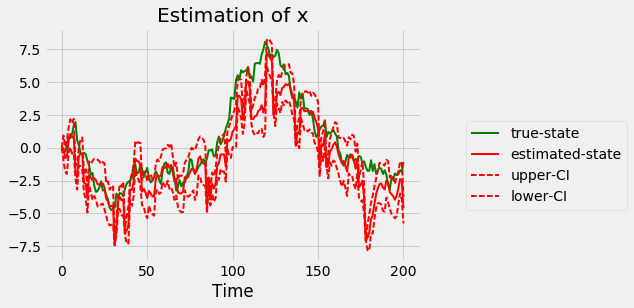

In [28]:
#計算を行う
MCF_3.Filtering()
summary = MCF_3.Get_summary(Per_CI=0.95,plot=True)

100%|██████████| 200/200 [00:31<00:00,  6.27it/s]


Simulation finished successfully.


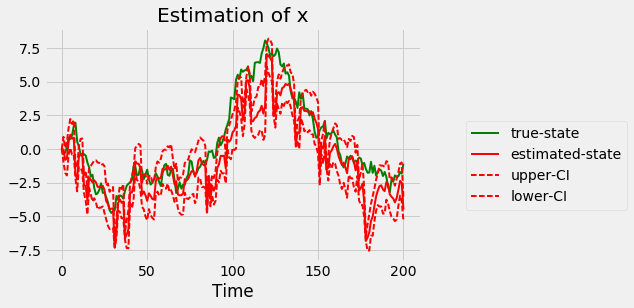

In [29]:
#層化リサンプリングを用いて計算を行う
MCF_3.Filtering(resampling_method="stratified")
summary = MCF_3.Get_summary(Per_CI=0.95,plot=True)

##### 結論
1. モンテカルロフィルタを用いた状態推定ができた
2. SVモデルについては、対数変換を用いて尤度を計算することで、有用な推定結果を得ることができた。
3. 層化サンプリングの実行は、本時点において効果は確認できなかった。少ないサンプル数で有用？？

###### 今後
1. 粒子平滑化(smoothing): 固定ラグ平滑化とリサンプル・ムーブ法
2. 自己組織化状態空間モデルを用いたパラメータ推定

#### 以下残骸です

### For seminer 

Define $P(x)$ as function, where $x$ is a random variable. <br>
If we get  $N$ i.i.d. samples for $x$, which are $x^{(1)}, ... , x^{(N)}$, we can estimate the expectation $E(P)$ or variance $V(P)$ as below.

$$\hat{E(P)} = \frac{1}{N}\sum^N_{n=1} P(x^{(n)})$$
$$\hat{V(P)} = \frac{1}{N-1}\sum^N_{n=1} (P(x^{(n)}) - \hat{E(P)})^2$$

Here, $\hat{E(P)}$ and $\hat{V(P)}$ are unbiased and consistent. The order for particles to convergent the true distribution is $N^{-\frac{1}{2}}$.

***

A nonlinear non-Gaussian state space model for the time series $y_t, t={1,2,..., T}$ is defined as follows. 

$$x_t = F(x_{t-1}, \nu_t)$$
$$y_t = H(x_{t}, \omega_t)$$

where $x_t$ is state vector, the system noise $\nu_t$ and the observation noise $\omega_t$ are white noise sequences with densities $q(\nu)$, $r(\omega)$, respectively.

***

First, generate particles $x_0^{(i)}, i = 1, ..., N$ according to initial distribution beforehand.<br>
Particle Filter execute three procedure below with each $t = 1, ..., T$. <br><br>
For $i = 1, ..., N$, <br>
(1) Prediction : generate particles $x_t^{(i)}$ from $x_{t-1}^{(i)}$ as $p(x_t|x_{t-1})$ which is calculated by system equation<br>
(2) Likelihood Calculation : calc likelihood $w_t^{(i)} = p(y_t|x_t^{(i)})$, which is calculated by measurement equation<br>
<br>
Then,<br>
(3) Resampling : regenerate $N$ particles according to the likelihood $w_t^{(i)}, i = 1, ..., N$

1. 変数x,y間の一次の相関が強いときは、当然両者を一意には判定できない→粒子（x,y）の散布図をとって回帰すれば、関係性は見えそう
2. 位相のずれが$2\pi$を足したものと両方がありうる、2乗の項がある→粒子の平均では正しい推定にならない。分布を見る必要がある
3. どこを観測値、どこを状態変数とするかという問題がある。1次元移流拡散方程式においては、u, D → $\hat{C}$ →（観測誤差＋モデル誤差）→ 実観測値と本来は三段階に分かれる。